### Access libraries that will be used

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [101]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'P:\Users\amayer\Documents\GitHub\Orlando-Magic-GameScore-Stats-and-Graphics-2020_21-Season\Data\ConvertStatHead.csv')
magic.head()

,FirstName,LastName,Age,Pos,Tm,Column1,Opp,W/L,Date,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,Nikola,Vucevic,30-066,C,ORL,Away,OKC,W,12/29/2020,1,...,3,7,10,5,1,0,1,0,28,27.9
1,Nikola,Vucevic,30-077,C,ORL,Away,DAL,L,1/9/2021,1,...,3,12,15,2,2,0,0,3,30,26.7
2,Nikola,Vucevic,30-070,C,ORL,Home,OKC,L,1/2/2021,1,...,2,11,13,2,0,0,1,1,30,25.2
3,Nikola,Vucevic,30-072,C,ORL,Home,CLE,W,1/4/2021,1,...,2,6,8,2,2,3,0,0,23,24.1
4,Evan,Fournier,28-055,G-F,ORL,Home,MIA,W,12/23/2020,1,...,0,0,0,4,3,0,2,2,25,22.1


In [102]:
magic.tail()

,FirstName,LastName,Age,Pos,Tm,Column1,Opp,W/L,Date,GS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
100,Karim,Mané,20-229,G,ORL,Home,PHI,L,12/31/2020,0,...,0,4,4,0,0,0,0,1,0,-1.3
101,Dwayne,Bacon,25-115,G,ORL,Home,MIA,W,12/23/2020,1,...,0,3,3,3,0,0,0,2,0,-1.3
102,Mohamed,Bamba,22-239,C,ORL,Home,CLE,W,1/6/2021,0,...,0,1,1,0,0,0,0,2,0,-1.9
103,Michael,Carter-Williams,29-086,G,ORL,Home,CLE,W,1/4/2021,1,...,1,0,1,3,0,1,2,2,0,-2.1
104,Gary,Clark,26-053,F,ORL,Away,HOU,L,1/8/2021,1,...,0,4,4,0,0,1,2,1,0,-2.6


### Display data using histogram, swarmplot, and boxplot

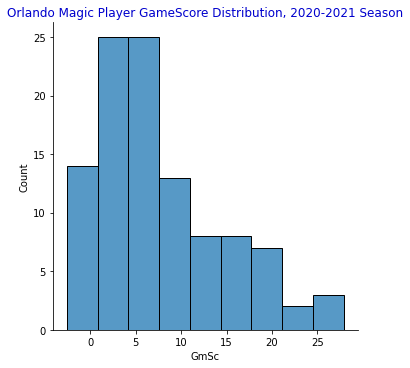

In [103]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

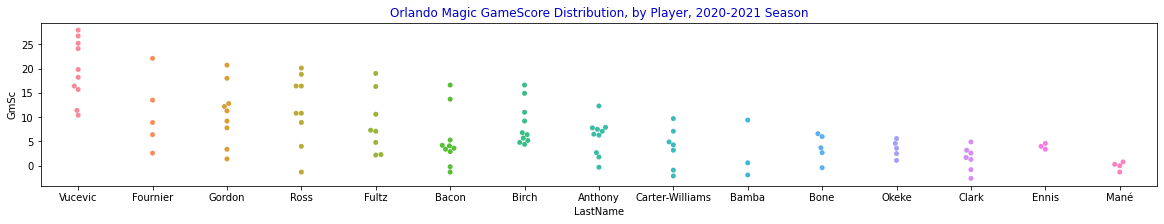

In [104]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

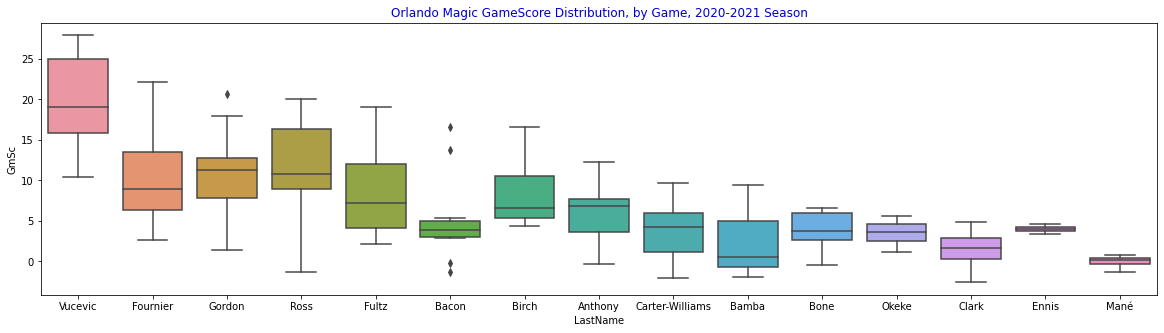

In [105]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


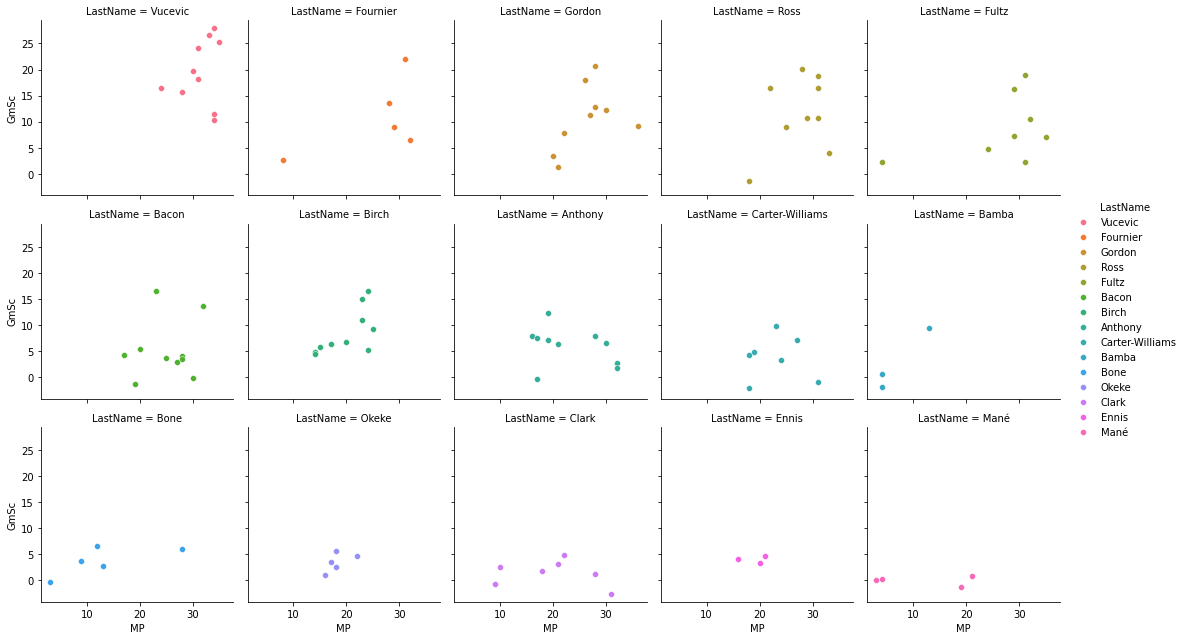

In [106]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

K:\Users\adria\Downloads\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


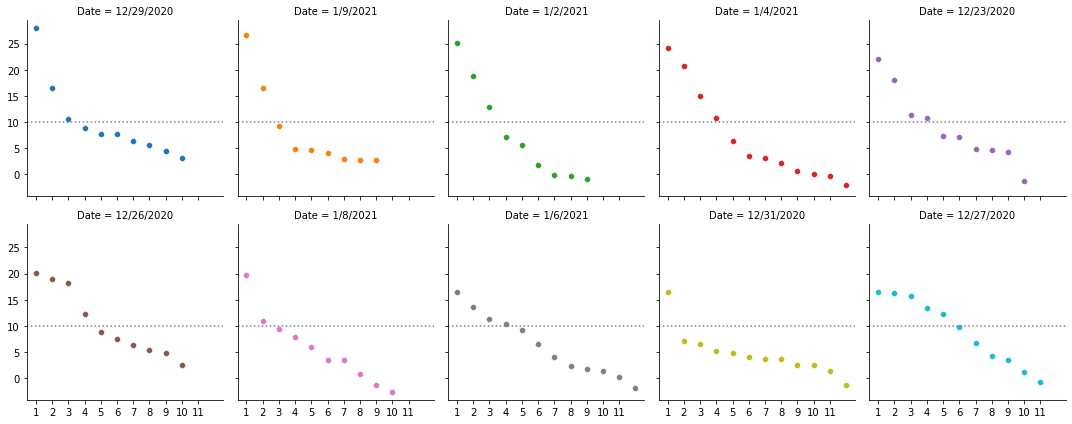

In [107]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [108]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          10.0   5.960000  3.629264  -0.3   3.600   6.80   7.725  12.3
Bacon            10.0   5.230000  5.646248  -1.3   3.025   3.85   5.025  16.6
Bamba             3.0   2.700000  5.935487  -1.9  -0.650   0.60   5.000   9.4
Birch            10.0   8.500000  4.344089   4.4   5.325   6.60  10.550  16.6
Bone              5.0   3.720000  2.806599  -0.4   2.700   3.70   6.000   6.6
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark             7.0   1.471429  2.511118  -2.6   0.250   1.70   2.900   4.9
Ennis             3.0   4.000000  0.600000   3.4   3.700   4.00   4.300   4.6
Fournier          5.0  10.700000  7.502333   2.6   6.400   8.90  13.500  22.1
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon            9.0  10.755556  6.232197   1.4   7.800  11.30  12.800  20.7
Mané              4.0  -0.050000  0.896289  -1.3  -0.325   0.15   0.425   0.8
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross              9.0  11.655556  7.096498  -1.3   8.900  10.80  16.400  20.1
Vucevic          10.0  19.580000  6.238198  10.4  15.875  19.00  24.925  27.9